In [211]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random


In [212]:
# Read the data into a Pandas DataFrame
file_path = Path("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\heart_attack_prediction_dataset.csv")
#file_path = Path("\\Resources\\heart_attack_prediction_dataset.csv")
heart_df = pd.read_csv(file_path)
heart_df.head()



,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [213]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [214]:
columns_to_delete = ["Patient ID","Blood Pressure","Heart Rate","Diabetes","Family History","Smoking","Obesity","Alcohol Consumption","Exercise Hours Per Week","Diet","Previous Heart Problems","Medication Use","Stress Level","Sedentary Hours Per Day","Income","Physical Activity Days Per Week","Sleep Hours Per Day","Country","Hemisphere"]
heart_df.drop(columns=columns_to_delete,inplace=True)


In [215]:
heart_bar=heart_df.loc[heart_df['Heart Attack Risk'] == 1]
heart_bar =heart_bar[["Continent","Heart Attack Risk"]]
heart_bar = heart_bar.groupby("Continent")
heart_count =heart_bar['Continent'].count()
heart_count

Continent
Africa           322
Asia             900
Australia        319
Europe           775
North America    324
South America    499
Name: Continent, dtype: int64

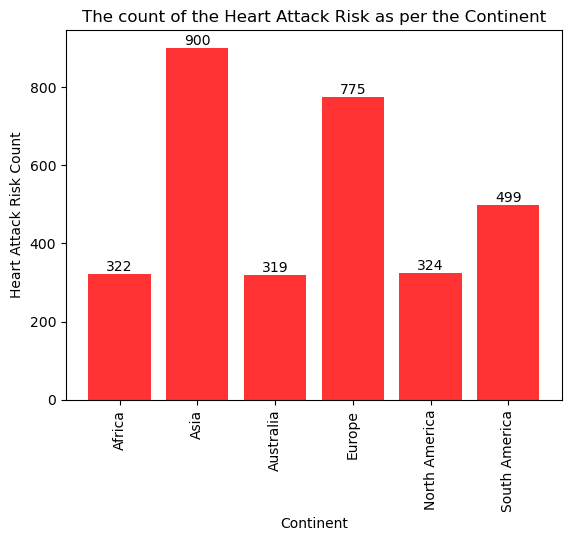

In [216]:
#Bar Chart for Heart Attack Risk as per the Continent
x_axis =heart_count.index.values
x_axis
y_axis = heart_count.values
y_axis
bars = plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')
# Add count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

# Set the xlabel and ylabel, title using class methods
plt.title("The count of the Heart Attack Risk as per the Continent")
plt.xlabel("Continent")
plt.ylabel("Heart Attack Risk Count")
plt.xticks(rotation="vertical")
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Continent_count.png")
plt.show()


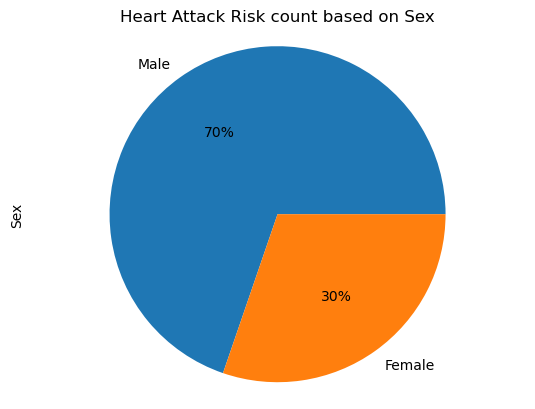

In [217]:
heart_pie=heart_df.loc[heart_df['Heart Attack Risk'] == 1]
heart_pie = heart_pie[["Sex","Heart Attack Risk"]]
heart_pie["Sex"].value_counts()
Sex=["Male", "Female"]
gender_data.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.title('Heart Attack Risk count based on Sex')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Countbasedonsex.png")
plt.show()

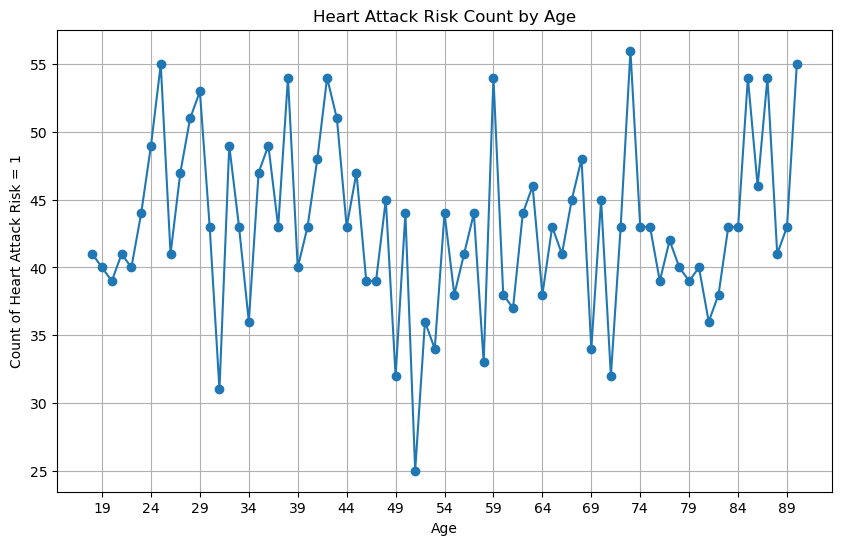

In [197]:
# Create a line chart
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where heart attack risk is 1
heart_attack_df = heart_df[heart_df['Heart Attack Risk'] == 1]

# Group the data by age and count the occurrences
age_counts = heart_attack_df['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.title('Heart Attack Risk Count by Age')
plt.xlabel('Age')
plt.ylabel('Count of Heart Attack Risk = 1')

# Customize ticks for better readability
plt.xticks(range(19, 91, 5))  # Adjust the range and step size as needed

# Show plot
plt.grid(True)
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Line.png")
plt.show()

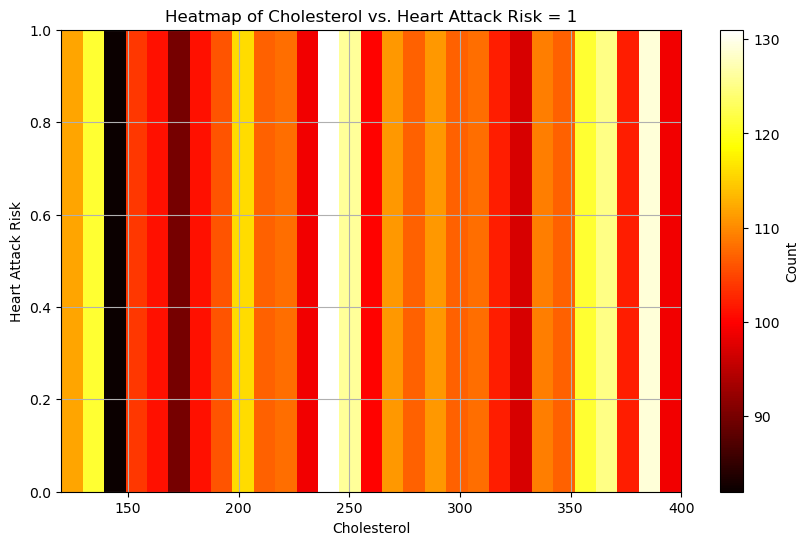

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for rows where heart attack risk is 1
heart_attack_df = heart_df[(heart_df['Heart Attack Risk'] == 1) & 
                           (heart_df['Cholesterol'] >= 120) & 
                           (heart_df['Cholesterol'] <= 400)&
                           ()

# Extract cholesterol and heart attack risk columns
cholesterol = heart_attack_df['Cholesterol']
heart_attack_risk = heart_attack_df['Heart Attack Risk']

# Create heatmap
plt.figure(figsize=(10, 6))
plt.hist2d(cholesterol, heart_attack_risk, bins=[np.linspace(120, 400, 30), [0, 1]], cmap='hot')

# Add labels and title
plt.title('Heatmap of Cholesterol vs. Heart Attack Risk = 1')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Attack Risk')

# Add colorbar
plt.colorbar(label='Count')

# Show plot
plt.grid(True)
plt.show()


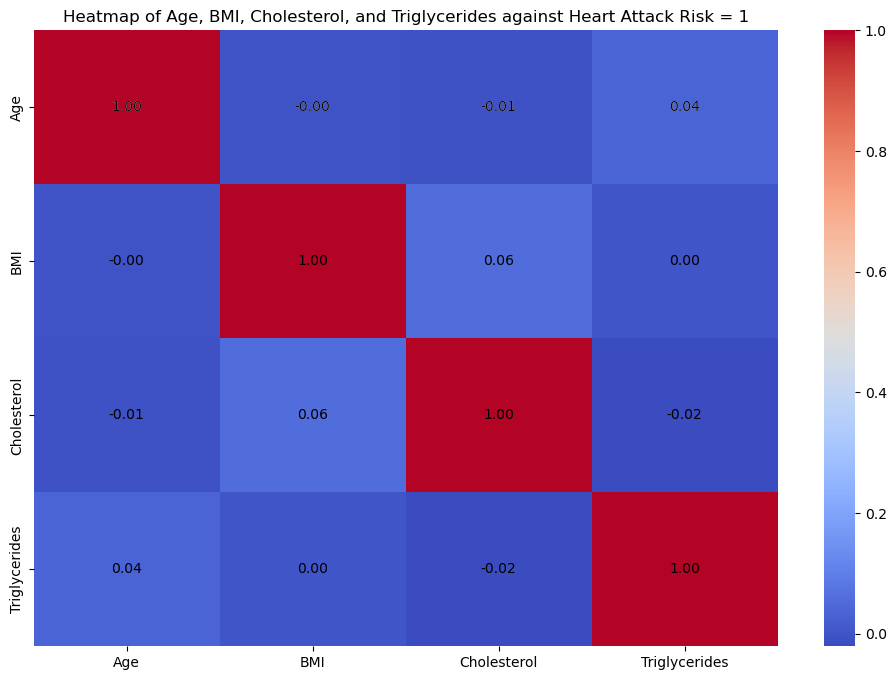

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where heart attack risk is 1
heart_attack_df = heart_df[heart_df['Heart Attack Risk'] == 1]

# Extract data columns
data = heart_attack_df[['Age', 'BMI', 'Cholesterol', 'Triglycerides']]

# Calculate correlation matrix
corr_matrix = data.corr()

# Create the heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


# Manually adjust annotation position for better visibility
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                 ha='center', va='center', fontsize=10, color='black')
        
plt.title('Heatmap of Age, BMI, Cholesterol, and Triglycerides against Heart Attack Risk = 1')
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Heatmap.png")
plt.show()


In [233]:
import plotly.graph_objects as go
import pandas as pd

# Filter the DataFrame for rows where heart attack risk is 1
heart_attack_df = heart_df[heart_df['Heart Attack Risk'] == 1]

# Extract data columns
data = heart_attack_df[['Age', 'BMI', 'Cholesterol', 'Triglycerides']]

# Create a correlation matrix
corr_matrix = data.corr()

# Create the heatmap figure

fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Cividis'))
'''
fig = go.Figure(data=go.Heatmap(
                   z=[[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]],
                   colorscale='Viridis'))

# fig.show()
'''
# Add title and axis labels
fig.update_layout(
    title='Heatmap of Age, BMI, Cholesterol, and Triglycerides against Heart Attack Risk = 1',
    xaxis_title='Variables',
    yaxis_title='Variables')

# Show the plot
fig.show()
